# 轉折判斷法(Elbow)

## 載入相關套件

## 生成分類資料

In [ ]:
from sklearn.datasets import  make_blobs # make_blobs 產生群集資料
import matplotlib.pyplot as plt # 繪圖
# 產生群集資料

X, y = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.7, # 0.5, 控制群集的標準差，值越大，群集越分散
                  shuffle=True, # 打亂資料
                  random_state=0) # 固定隨機種子，讓每次產生的資料相同
# n_samples : 資料點數量
# n_features : 資料點的特徵數量
# centers : 群集的數量
                

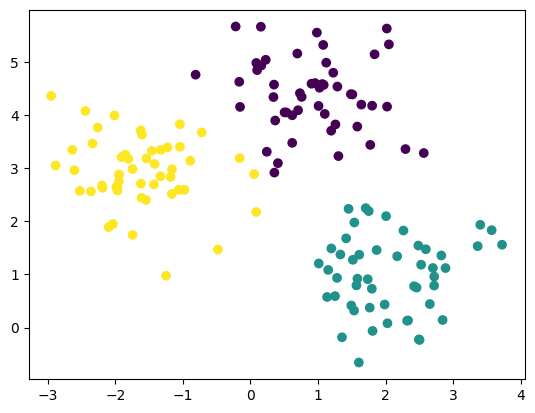

In [5]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y)#, marker='o', edgecolor='black', s=50
plt.show()

## 訓練模型

In [ ]:
from sklearn.cluster import KMeans # 

km = KMeans(n_clusters=3, 
            init='random', # 'k-means++' # 初始化質心的方法
            n_init=10, # 重新初始化質心的次數
            max_iter=300, # 最大迭代次數
            tol=1e-04, # 收斂容忍度
            random_state=0)

## 模型評估

In [7]:
# 顯示失真(Distortion)的程度
y_km = km.fit_predict(X)                  
print('Distortion: %.2f' % km.inertia_)

Distortion: 142.05


## 轉折判斷法(Elbow)

In [14]:
distortions = [] # 紀錄失真值
# 測試 1~10 群的失真
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_) # 紀錄失真值


print(distortions)
distortions


[787.4705224130548, 350.3272522799996, 142.05299275153527, 121.42866047187395, 104.51637294295406, 90.47025364731644, 76.8421886850996, 66.82799677891234, 58.621618523439956, 51.484332790010704]


[787.4705224130548,
 350.3272522799996,
 142.05299275153527,
 121.42866047187395,
 104.51637294295406,
 90.47025364731644,
 76.8421886850996,
 66.82799677891234,
 58.621618523439956,
 51.484332790010704]

## 繪圖

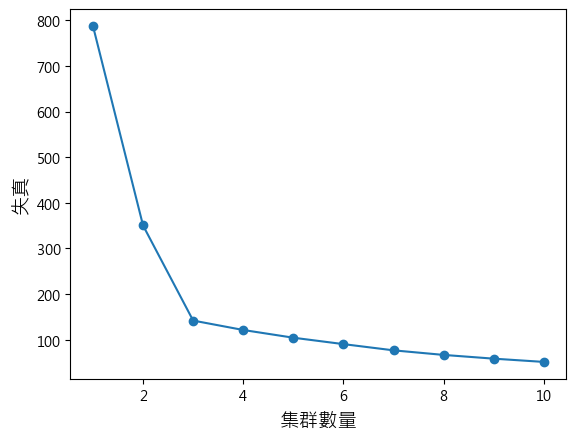

In [ ]:
import matplotlib.pyplot as plt

# 繪製失真值與群集數量的關係圖, 用來找出最佳群集數量的肘點(Elbow Point) , 找出最佳群集數量的方法稱為肘部法則(Elbow Method)

# 修正中文亂碼 
# plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] 
plt.rcParams["font.family"] = ["Microsoft JhengHei"]
plt.rcParams['axes.unicode_minus'] = False

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('集群數量', fontsize=14)
plt.ylabel('失真', fontsize=14)